# Forest Fires in Brazil

Questions:
    
1. Display Top 5 Rows of The Dataset
2. Check Last 5 Rows
3. Find Shape of Our Dataset (Number of Rows And Number of Columns)
4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
5. Check For Duplicate Data and Drop Them
6. Check Null Values In The Dataset
7. Get Overall Statistics About The Dataframe
8. Rename Month Names To English
9. Total Number of Fires Registered
10. In Which Month Maximum Number of Forest Fires Were Reported?
11. In Which Year Maximum Number of Forest Fires Was Reported?
12. In Which State Maximum Number of Forest Fires Was Reported?
13. Find Total Number of Fires Were Reported In Amazonas
14. Display Number of Fires Were Reported In Amazonas (Year-Wise)
15. Display Number of Fires Were Reported In Amazonas (Day-Wise)
16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’
17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)
18.  To Find The State Names Where Fires Were Reported In 'dec' Month

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #basic Vizulization Library 
%matplotlib inline 

In [2]:
data=pd.read_csv(r"C:\Users\Admin\Downloads\practise1\amazon.csv")

In [3]:
#Display Top 5 Rows of The Dataset
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [4]:
#Check the Last 5 Rows of The Dataset
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [5]:
#Find Shape of Our Dataset (Number of Rows & Number of Columns)
data.shape

(6454, 5)

In [6]:
#Get Information About Our Dataset Like Total Number Rows, 
#Total Number of Columns, Datatypes of Each Column And Memory Requirement
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [7]:
#Check For Duplicate Data and Drop Them
data.duplicated().sum()

32

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

In [10]:
#Check Null Values In The Dataset
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [11]:
#Get Overall Statistics About The Dataframe
data.describe(include='all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,2012-01-01
freq,NaN,697,540,NaN,324
mean,2007.490969,NaN,NaN,108.815178,NaN
std,5.731806,NaN,NaN,191.142482,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2003.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.497000,NaN
75%,2012.000000,NaN,NaN,114.000000,NaN


In [12]:
data.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


In [13]:
#Rename Month Names To English
data.head(2)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01


In [14]:
data.month.unique()

array(['Janeiro', 'Fevereiro', 'Mar�o', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [15]:
data['month_new']=data['month'].map({'Janeiro':'jan',
                                    'Fevereiro':'feb',
                                    'Março':'march',
                                    'Abril':'april',
                                    'Maio':'may',
                                    'Junho':'jun',
                                    'Julho':'july',
                                    'Agosto':'august',
                                    'Setembro':'sep',
                                    'Outubro':'oct',
                                    'Novembro':'nov',
                                    'Dezembro':'dec'
                                   })

In [16]:
data.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


In [17]:
#Total Number of Fires Registered
data.head(2)

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan


In [18]:
data.shape[0]

6422

In [19]:
#In Which Month Maximum Number of Forest Fires Were Reported?
data1= data.groupby('month_new')['number'].sum().sort_values(ascending=False)
data1

month_new
july      92319.113
oct       88681.579
august    88050.435
nov       85508.054
sep       58578.305
dec       57535.480
jun       55997.675
jan       47681.844
may       34725.363
feb       30839.050
april     28184.770
Name: number, dtype: float64

In [20]:
data2= data.groupby('month_new')['number'].sum().reset_index()
data2

,month_new,number
0,april,28184.770
1,august,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,july,92319.113
6,jun,55997.675
7,may,34725.363
8,nov,85508.054
9,oct,88681.579


<AxesSubplot:xlabel='month_new', ylabel='number'>

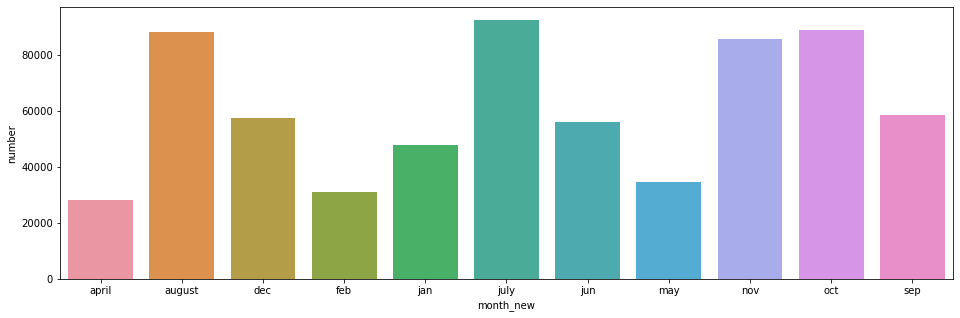

In [21]:
plt.figure(figsize=(16,5))
sns.barplot(x="month_new",y="number",data=data2)

In [22]:
#In Which Year Maximum Number of Forest Fires Was Reported?
data3= data.groupby('year')['number'].sum().sort_values(ascending=False)
data3

year
2003    42760.674
2016    42212.229
2015    41208.292
2012    40084.860
2014    39621.183
2009    39116.178
2004    38450.163
2002    37390.600
2010    37037.449
2017    36619.624
2013    35137.118
2005    35004.965
2011    34633.545
2006    33824.161
2007    33028.413
2008    29378.964
2001    29054.612
2000    27351.251
1999    26882.821
1998    20013.971
Name: number, dtype: float64

In [23]:
data4= data.groupby('year')['number'].sum().reset_index()
data4

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<AxesSubplot:xlabel='year', ylabel='number'>

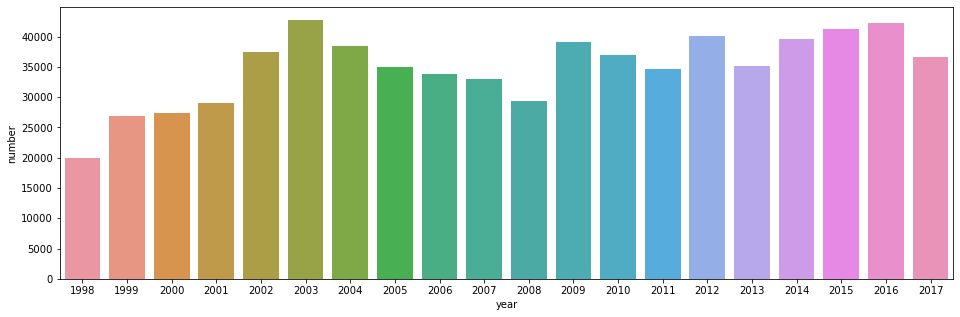

In [24]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=data4)

In [25]:
#In Which State Maximum Number of Forest Fires Was Reported?
data.head(2)

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan


In [26]:
data.groupby('state')['number'].sum().sort_values(ascending=False)

state
Mato Grosso         96246.028
Paraiba             52426.918
Sao Paulo           51121.198
Rio                 45094.865
Bahia               44746.226
Piau                37803.747
Goias               37695.520
Minas Gerais        37475.258
Tocantins           33707.885
Amazonas            30650.129
Ceara               30428.063
Maranhao            25129.131
Par�                24512.144
Pernambuco          24498.000
Roraima             24385.074
Santa Catarina      24359.852
Amapa               21831.576
Rondonia            20285.429
Acre                18464.030
Espirito Santo       6546.000
Alagoas              4606.000
Distrito Federal     3561.000
Sergipe              3237.000
Name: number, dtype: float64

In [27]:
data5=data.groupby('state')['number'].sum().reset_index()
data5

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


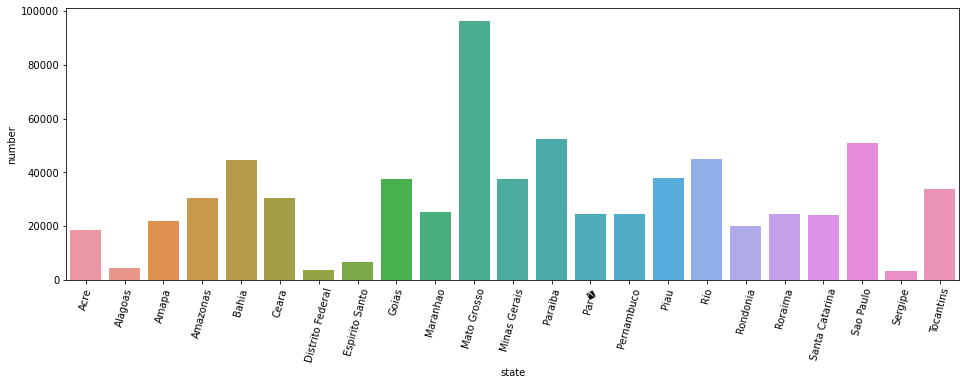

In [28]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=data5)
plt.xticks(rotation=75)
plt.show()

In [29]:
#Find Total Number of Fires Were Reported In Amazonas
data.head(2)

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan


In [30]:
data[data['state']=="Amazonas"]['number'].sum()

30650.129

In [31]:
#Display Number of Fires Were Reported In Amazonas (Year-Wise)
data6=data[data['state']=="Amazonas"]
data6

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,dec
953,2013,Amazonas,Dezembro,236.0,2013-01-01,dec
954,2014,Amazonas,Dezembro,293.0,2014-01-01,dec
955,2015,Amazonas,Dezembro,565.0,2015-01-01,dec


In [32]:
data7=data6.groupby('year')['number'].sum().reset_index()
data7

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


In [33]:
data6.groupby('year')['number'].sum().sort_values(ascending=False)

year
2002    2852.000
2008    2717.000
2014    2385.909
2010    2324.508
2004    2298.207
2016    2060.972
2005    1657.128
2011    1652.538
2003    1524.268
2009    1320.601
2001    1297.000
2015    1189.994
2012    1110.641
1999    1061.000
2006     997.640
1998     946.000
2017     906.905
2013     905.217
2000     853.000
2007     589.601
Name: number, dtype: float64

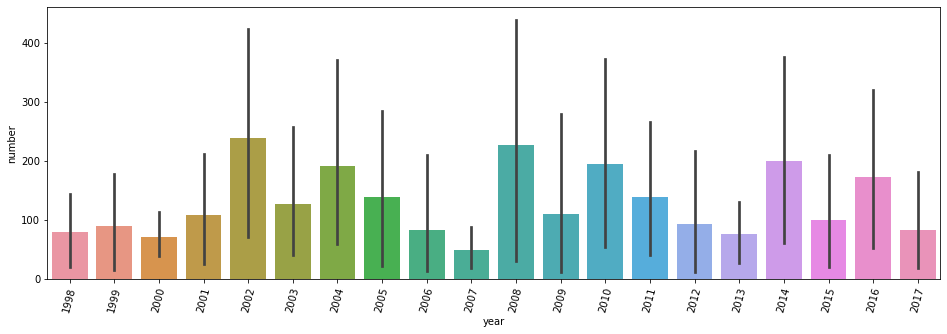

In [34]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=data6)
plt.xticks(rotation=75)
plt.show()

In [35]:
#Display Number of Fires Were Reported In Amazonas (Day-Wise)
data7 = data[data['state']=="Amazonas"]
data7.head(2)

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan


In [37]:
data7['new_date']=pd.to_datetime(data7.date)

<ipython-input-37-c7582367b7bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data7['new_date']=pd.to_datetime(data7.date)


In [40]:
data7.head(2)

,year,state,month,number,date,month_new,new_date
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan,1998-01-01
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan,1999-01-01


In [41]:
day=data7.groupby(data7['new_date'].dt.dayofweek).sum().number

import calendar

day.index = [calendar.day_name[x] for x in range(0,7)]
day= day.reset_index()

In [42]:
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<AxesSubplot:xlabel='index', ylabel='number'>

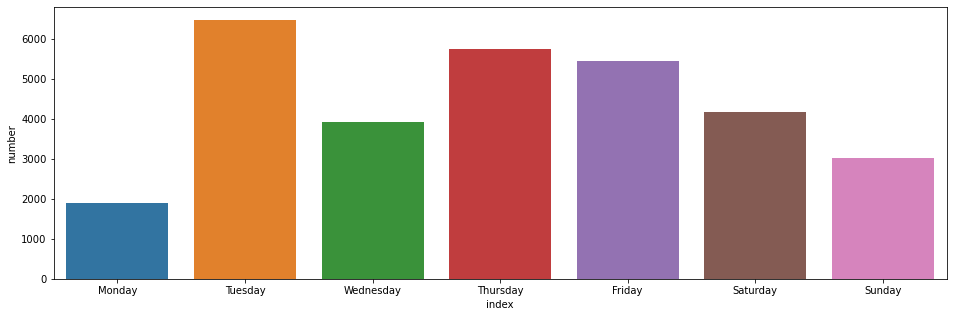

In [43]:
plt.figure(figsize=(16,5))
sns.barplot(x="index",y="number",data=day)

In [44]:
#Find Total Number of Fires Were Reported In 2015 And Visualize Data Based on Each ‘Month’
fire = data[data['year']==2015].groupby('month_new')['number'].sum().reset_index()
fire

,month_new,number
0,april,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,jun,3260.552
7,may,2384.000
8,nov,4034.518
9,oct,4499.525


<AxesSubplot:xlabel='month_new', ylabel='number'>

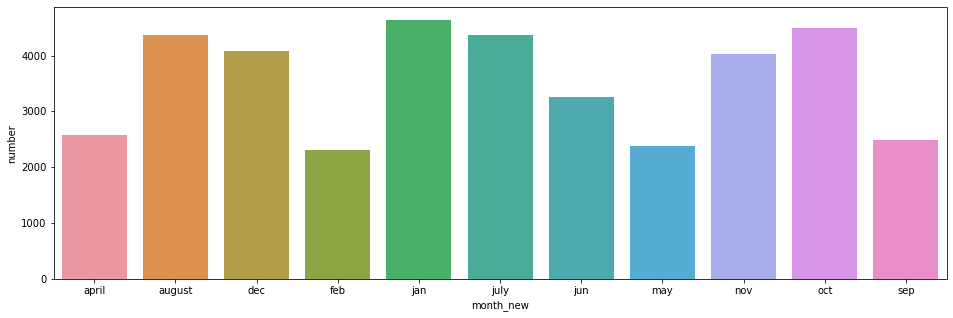

In [45]:
plt.figure(figsize=(16,5))
sns.barplot(x="month_new",y="number",data=fire)

In [48]:
#Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)
data8= data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


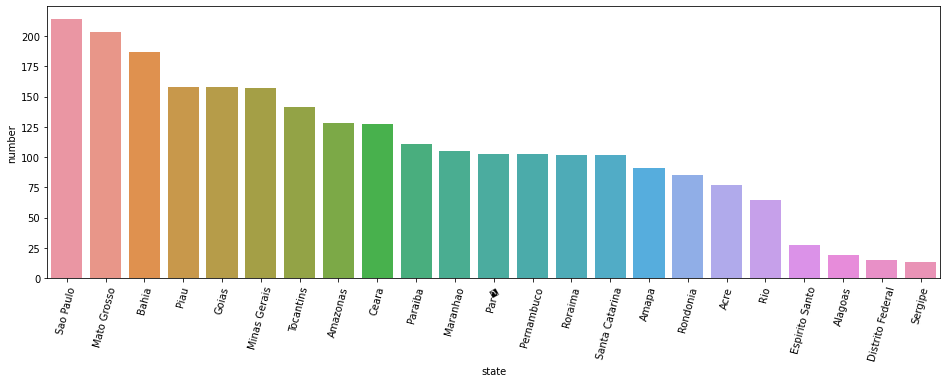

In [49]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=data8)
plt.xticks(rotation=75)
plt.show()

In [50]:
#To Find The State Names Where Fires Were Reported In 'dec' Month
data.head(2)

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan


In [53]:
data[data['month_new']=='dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Par�', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)